# Course Name: Visualisation for Data Analytics
# Objective: Social Network Analysis

### Q1. Create an undirected network like following?
![image.png](attachment:image.png)


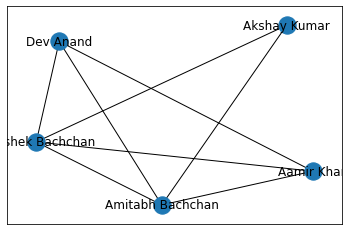

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
G_symmetric = nx.Graph()
G_symmetric.add_edge('Amitabh Bachchan','Abhishek Bachchan')
G_symmetric.add_edge('Amitabh Bachchan','Aamir Khan') 
G_symmetric.add_edge('Amitabh Bachchan','Akshay Kumar') 
G_symmetric.add_edge('Amitabh Bachchan','Dev Anand') 
G_symmetric.add_edge('Abhishek Bachchan','Aamir Khan') 
G_symmetric.add_edge('Abhishek Bachchan','Akshay Kumar') 
G_symmetric.add_edge('Abhishek Bachchan','Dev Anand') 
G_symmetric.add_edge('Dev Anand','Aamir Khan')
nx.draw_networkx(G_symmetric)

### Q2. Make a Asymmetric or directed  network like following
![image.png](attachment:image.png)

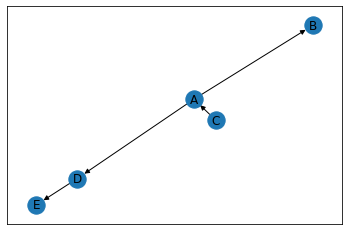

In [2]:
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric)

### Q3. Make a weighted network like following:
![image.png](attachment:image.png)

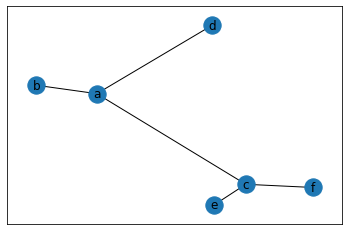

In [ ]:
G_weighted = nx.Graph()
G_weighted.add_edge('a','b', weight=2.5)
G_weighted.add_edge('a','c', weight=0.1)
G_weighted.add_edge('a','d', weight=0.1)
G_weighted.add_edge('c','e', weight=2.5)
G_weighted.add_edge('c','f', weight=2.5)
nx.draw_networkx(G_weighted)

{'a': Text(0.3838846148687461, -0.45766957387707546, 'a'),
 'b': Text(0.6320072691402219, -1.0, 'b'),
 'c': Text(-0.35261260717236154, 0.2949700683696237, 'c'),
 'd': Text(0.6623017089605683, 0.1137681477617445, 'd'),
 'e': Text(-0.4756627649668703, 0.8532851890518859, 'e'),
 'f': Text(-0.8499182208303043, 0.19564616869382123, 'f')}

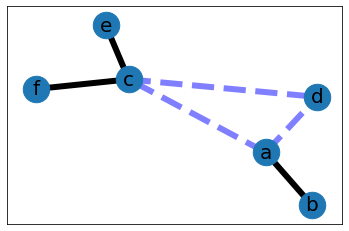

In [3]:
#Lector's ans

G = nx.Graph()
G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
 G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed")

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

### Q4. Find the actor(s) who worked with 3 or more actors in the following graph? 
![image.png](attachment:image.png)

[('Amitabh Bachchan', 4), ('Abhishek Bachchan', 4), ('Aamir Khan', 3), ('Akshay Kumar', 2), ('Dev Anand', 3)]
----------------
('Amitabh Bachchan', 4)
('Abhishek Bachchan', 4)
('Aamir Khan', 3)
('Dev Anand', 3)
----------------


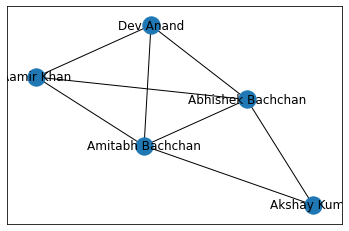

In [ ]:
G_symmetric = nx.Graph()
G_symmetric.add_edge('Amitabh Bachchan','Abhishek Bachchan')
G_symmetric.add_edge('Amitabh Bachchan','Aamir Khan') 
G_symmetric.add_edge('Amitabh Bachchan','Akshay Kumar') 
G_symmetric.add_edge('Amitabh Bachchan','Dev Anand') 
G_symmetric.add_edge('Abhishek Bachchan','Aamir Khan') 
G_symmetric.add_edge('Abhishek Bachchan','Akshay Kumar') 
G_symmetric.add_edge('Abhishek Bachchan','Dev Anand') 
G_symmetric.add_edge('Dev Anand','Aamir Khan')
nx.draw_networkx(G_symmetric)
print(G_symmetric.degree)
print('----------------')
for i in G_symmetric.degree:
    if(i[1]>=3):
        print(i)
print('----------------')

####  
This question can be answered by calculating degree of each node:

In [4]:
#Lectoror's ANS
degree_dev =  nx.degree(G_symmetric, 'Dev Anand')
degree_akh =  nx.degree(G_symmetric, 'Aamir Khan')

degree_ab =  nx.degree(G_symmetric, 'Abhishek Bachchan')

degree_aku =  nx.degree(G_symmetric, 'Akshay Kumar')

degree_abh =  nx.degree(G_symmetric, 'Amitabh Bachchan')

print(degree_dev)
print(degree_akh)
print(degree_ab)
print(degree_aku)
print(degree_abh)

3
3
4
2
4


###  We will now do some basic analysis of Tag network dataset downloaded from the Kaggle:
Link: https://www.kaggle.com/stackoverflow/stack-overflow-tag-network


stacknetworklinks: contains links of the network, the source and target tech tags plus the value of the the link between each pair

stacknetworknodes: contains nodes of the network, the name of each node, which group that node belongs to (calculated via a cluster walktrap), and a node size based on how often that technology tag is used

### Q5. Load the data in files stack_network_nodes.csv, stack_network_links.csv and print the basic information about it.

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
nodes = pd.read_csv('stack_network_nodes.csv')
edges = pd.read_csv('stack_network_links.csv')

In [ ]:
nodes.head()

,name,group,nodesize
0,html,6,272.45
1,css,6,341.17
2,hibernate,8,29.83
3,spring,8,52.84
4,ruby,3,70.14


In [ ]:
edges.head()

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925


In [ ]:
#Lectoror's ANS
G = nx.Graph()
df=df_nodes
df1=df_edges 
for index, row in df.iterrows():
    G.add_node(row["name"],group = row["group"], nodesize = row["nodesize"] )
for index, row in df1.iterrows():
    G.add_edge(row["source"], row["target"], weight = row["value"])
print(nx.info(G))

### Q6. Make a bar chart of degreee distribution? 

In [ ]:
G = nx.Graph()

In [ ]:
for index, row in nodes.iterrows():
    G.add_node(row["name"],group = row["group"], nodesize = row["nodesize"] )
for index, row in edges.iterrows():
    G.add_edge(row["source"], row["target"], weight = row["value"])

In [ ]:
print(nx.info(G))

Graph with 115 nodes and 245 edges


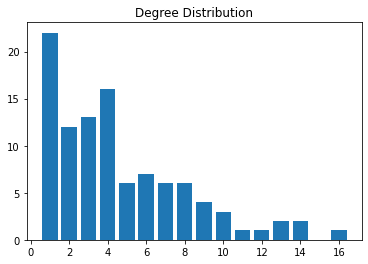

In [ ]:
import collections

#draw degree distribution
components = nx.connected_components(G)
largest_component = max(components, key=len)
G_large = G.subgraph(largest_component)
def plot_degree_distribution(G_large):
    degree_sequence = sorted([d for n, d in G_large.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    fig, ax = plt.subplots()
    plt.title("Degree Distribution")
    plt.bar(deg, cnt)
  
plot_degree_distribution(G_large)

### Q7. print avg. distance?

In [ ]:
print(nx.average_shortest_path_length(G_large))

4.507862550960978


### Q8. Make a word cloud using data in nodes file?  Use 'name' attribute for making the word cloud?

In [ ]:
df = pd.read_csv('stack_network_nodes.csv')
print(df.head())


        name  group  nodesize
0       html      6    272.45
1        css      6    341.17
2  hibernate      8     29.83
3     spring      8     52.84
4       ruby      3     70.14


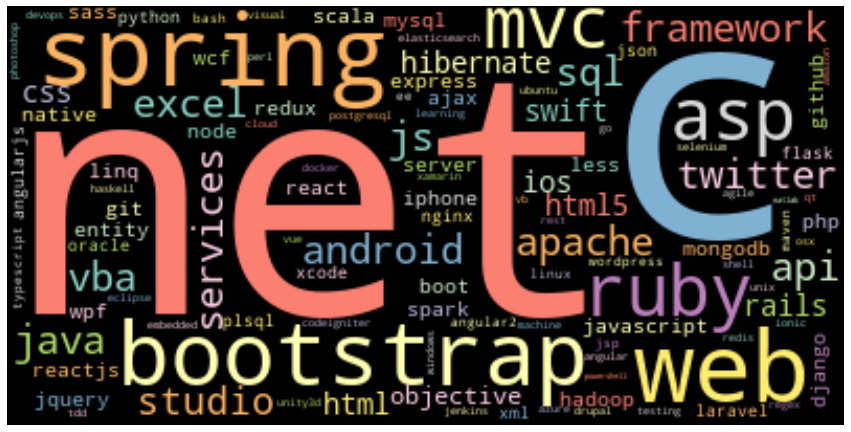

<Figure size 720x432 with 0 Axes>

In [ ]:
#word cloud
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df.name)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200,colormap='Set3', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

### Q9. Make a network using data in nodes file?
![image.png](attachment:image.png)

In [ ]:
def draw_graph(G,size):
    nodes = G.nodes()
    color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'}
    node_color= [color_map[d['group']] for n,d in G.nodes(data=True)]
    node_size = [d['nodesize']*10 for n,d in G.nodes(data=True)]
    pos = nx.drawing.spring_layout(G,k=0.70,iterations=60)
    plt.figure(figsize=size)
    options = {
    'edge_color': '#000000',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
    }
    nx.draw_networkx(G,pos=pos,node_color=node_color,node_size=node_size,**options)
    plt.show()

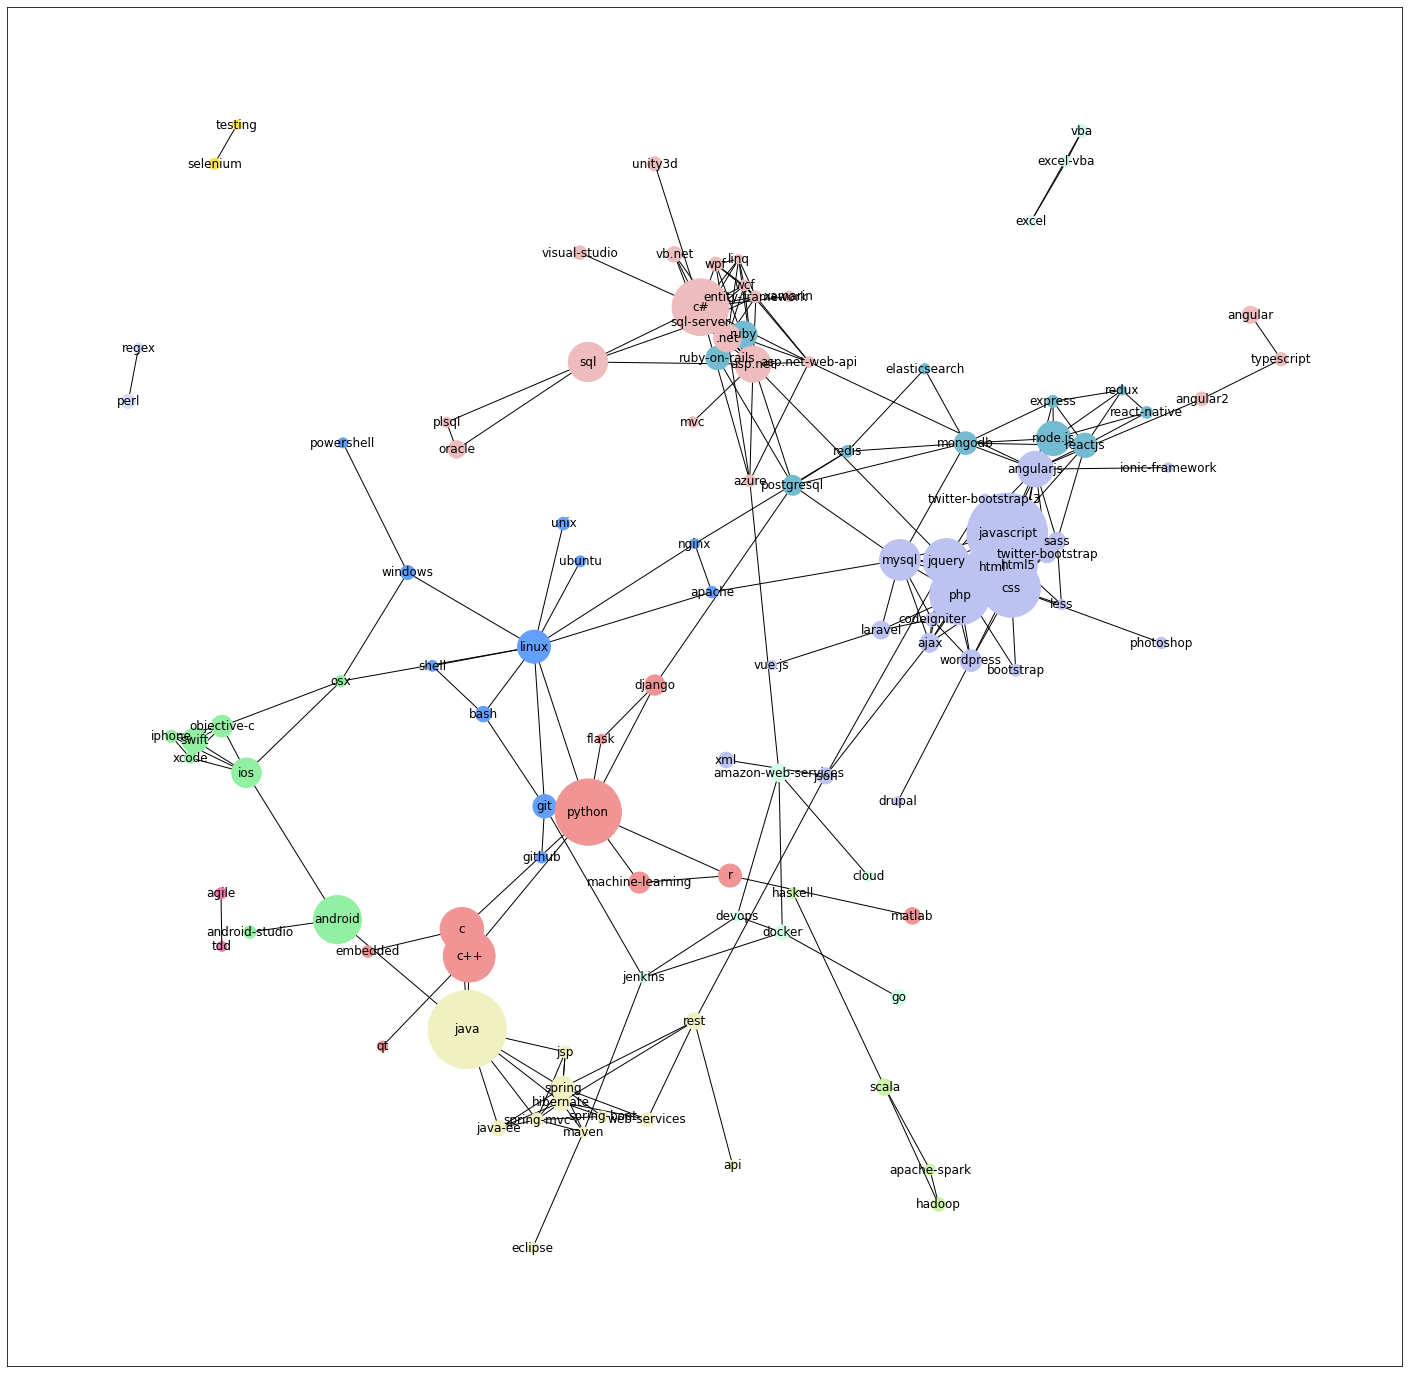

In [ ]:
draw_graph(G,size=(25,25))


### 10. Find all the cliques in the graph?


In [ ]:
cliques = list(nx.find_cliques(G))
clique_number = len(list(cliques))
print(clique_number)

89


In [ ]:
for clique in cliques:
    print(clique)

['jenkins', 'git']
['jenkins', 'maven']
['jenkins', 'docker', 'devops']
['python', 'linux']
['python', 'flask', 'django']
['python', 'c', 'c++']
['python', 'r', 'machine-learning']
['redux', 'node.js', 'reactjs', 'react-native']
['redux', 'node.js', 'reactjs', 'express']
['hadoop', 'scala', 'apache-spark']
['less', 'css', 'html5', 'sass']
['express', 'node.js', 'reactjs', 'angularjs', 'mongodb']
['apache', 'nginx', 'linux']
['apache', 'mysql']
['postgresql', 'ruby-on-rails', 'ruby']
['postgresql', 'django']
['postgresql', 'mongodb', 'redis']
['postgresql', 'mongodb', 'mysql']
['asp.net-web-api', 'angularjs']
['asp.net-web-api', 'c#', 'asp.net', 'entity-framework', 'sql-server', 'wcf']
['asp.net-web-api', 'c#', 'asp.net', 'azure']
['cloud', 'amazon-web-services']
['selenium', 'testing']
['node.js', 'reactjs', 'javascript', 'angularjs']
['reactjs', 'sass', 'angularjs', 'javascript']
['drupal', 'wordpress']
['go', 'docker']
['embedded', 'c']
['git', 'bash', 'linux']
['git', 'github']
['sw

### Q.11 Visualize Maximal Clique?

In [ ]:
sorted_cliques = sorted(list(nx.find_cliques(G)),key=len)


In [ ]:
max_clique_nodes = set()

for nodelist in sorted_cliques[-4:-1]:
    for node in nodelist:
        max_clique_nodes.add(node)

In [ ]:
max_clique = G.subgraph(max_clique_nodes)


In [ ]:
print(nx.info(max_clique))


Graph with 14 nodes and 43 edges


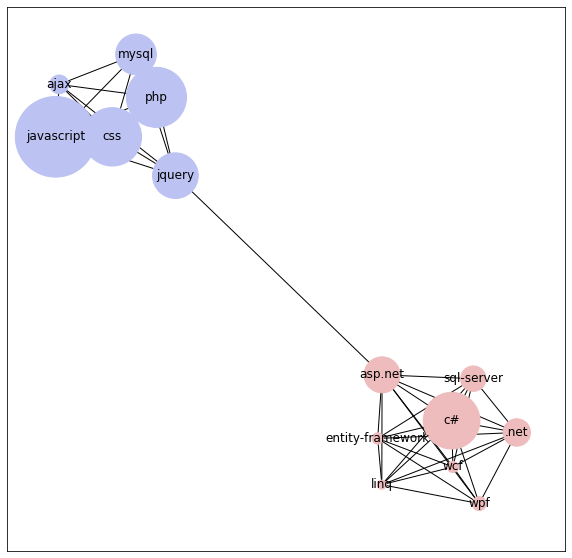

In [ ]:
draw_graph(max_clique,size=(10,10))


### Q 12. Visualizing Programming Language Network for 'c', 'c++', 'c#', 'java','python','ruby', 'scala','haskell' ,'javascript', 'sql'? 

In [ ]:
major_languages = ['c','c++','c#','java','python','ruby','scala','haskell','javascript','sql']

In [ ]:
p_language_nodes = []
for language in major_languages:
    neighbors = G.neighbors(language)
    p_language_nodes.extend(neighbors)

In [ ]:
programming_language_graph = G.subgraph(set(p_language_nodes))


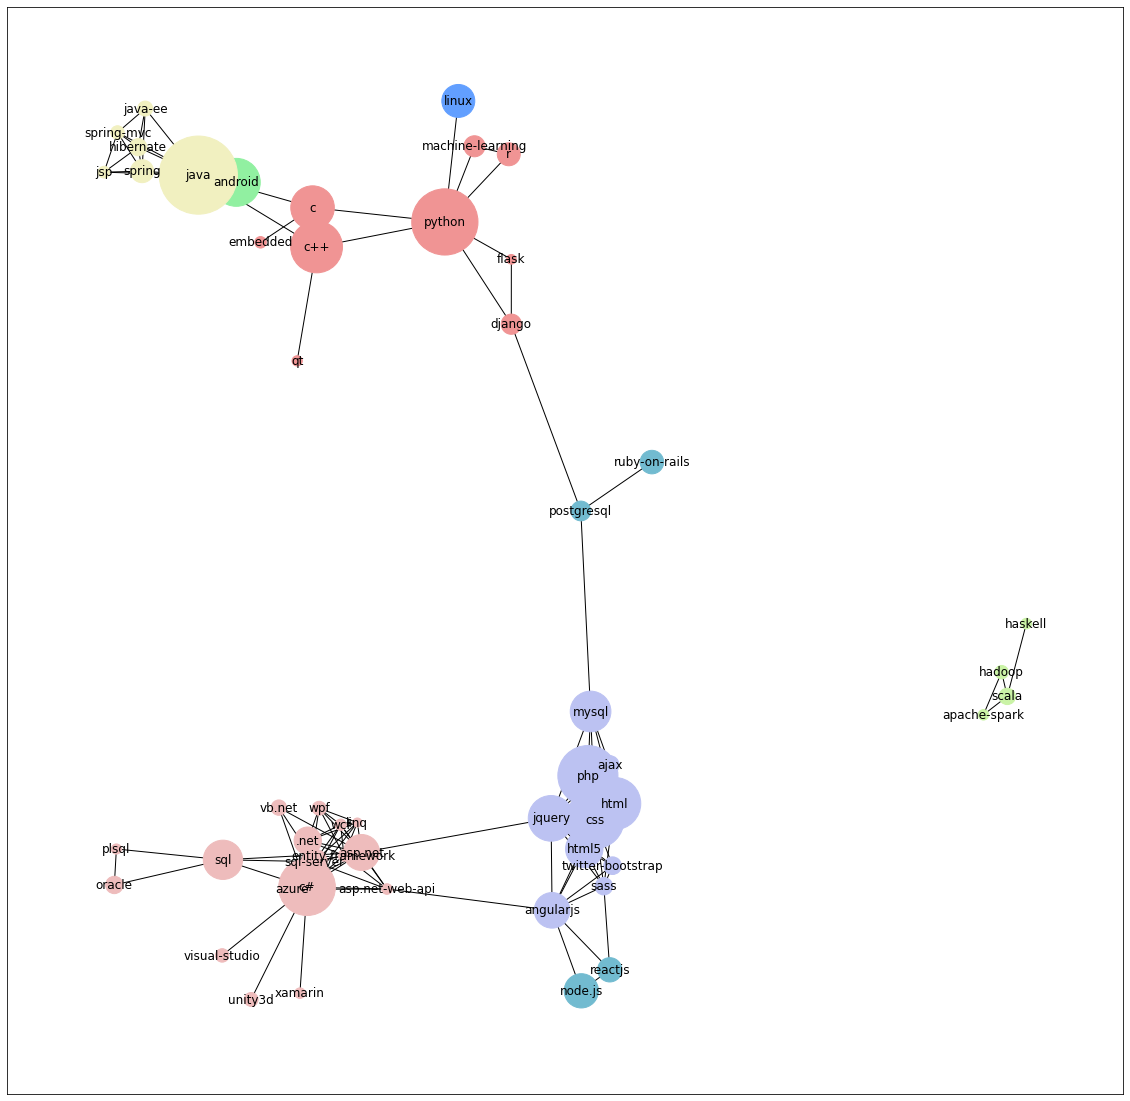

In [ ]:
draw_graph(programming_language_graph,size=(20,20))


In [ ]:
# code credit:
https://www.kaggle.com/mayeesha/network-analysis-for-dummies-stackoverflow-data
https://www.kaggle.com/agustikamayangsari/graph-stack-overflow
https://www.kaggle.com/mpwolke/stack-overflow
https://www.kaggle.com/mittuprince23/notebook150c2cd045